In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
# Accuracy Data
mnist = pd.read_csv("mnist.csv")
cifar = pd.read_csv("cifar.csv")

# Step Time Data
mnistT = pd.read_csv("mnist_time.csv")
cifarT = pd.read_csv("cifar10_time.csv")

# Total Time data per cluster and per 
timeC = pd.read_csv("Time.csv")
timeT = pd.read_csv("TimeT.csv")

In [3]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)
sns.set_context("paper",rc={"lines.linewidth": 4})
sns.set_style("ticks")
# plt.style.use('seaborn-pastel')
# sns.despine()

In [4]:
def plot_graph(df, name, yLow, yTop):
    indata = df.copy()
    indata["Test Accuracy"] = indata["Test Accuracy"] /100
    # Converting 2 columns into 1 as required by Seaborn
    melted_data=pd.melt(indata[["Architecture","Test Accuracy","Accuracy"]],['Architecture'])
    # print(melted_data)
    melted_data.columns = ['Architecture','Type','Accuracy']
    #melted_data
    ax = sns.lineplot(y = "Accuracy", x= "Architecture",hue='Type', style = 'Type',data = melted_data, markers=True, sort=False)
    ax.set(ylim=(yLow, yTop))
    sns.despine(bottom=False, left=False, ax=ax)
    plt.savefig(name +'.png', dpi=500)
    plt.show()

def timePlot(data, name):
    df = data.copy()
    ax = sns.lineplot(y = 'Time', x= 'Cluster Size', hue='Dataset', style='Dataset',data = df, markers=True, sort=False)
    sns.despine(bottom=False, left=False, ax=ax)
    plt.savefig(name +'.png', dpi=500)
    plt.ylabel('Time (in seconds)')
    plt.show()

def barPlotNice(data,name):
    mnistT = data.copy()
    mnistT['nTime2'] = mnistT['time1'] + mnistT['time2']
    mnistT['nTime3'] = mnistT['nTime2'] + mnistT['time3']
    mnistT['nTime4'] = mnistT['nTime3'] + mnistT['time4']
    mnistT
    # Plot the total time till 4
    sns.set_color_codes("pastel")
    ax = sns.barplot(x="cluster", y="nTime4", data=mnistT, label="Time 4", color=sns.color_palette("Blues")[2])
    # Plot the total time till 3
    #sns.set_color_codes("muted")
    ax = sns.barplot(x="cluster", y="nTime3", data=mnistT, label="Time 3", color=sns.color_palette("Blues")[3])
    ax = sns.barplot(x="cluster", y="nTime2", data=mnistT, label="Time 2", color=sns.color_palette("Blues")[4])
    ax = sns.barplot(x="cluster", y="time1", data=mnistT, label="Time 1", color=sns.color_palette("Blues")[5])
    ax.set(xlabel='Cluster Size', ylabel='Time')
    ax.legend()
    sns.despine(bottom=False, left=False)
    plt.savefig(name +'.png', dpi=500)
    plt.show()

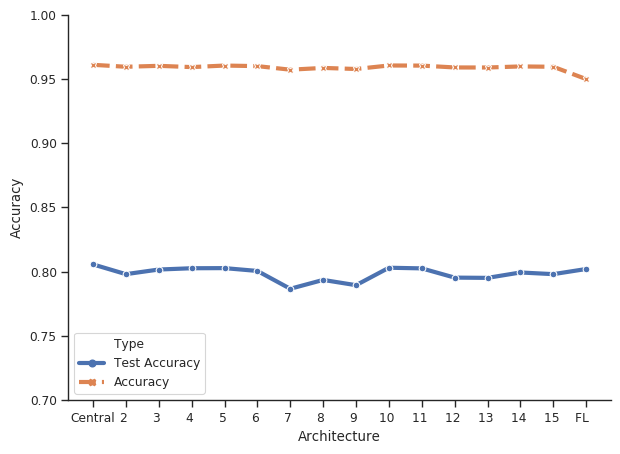

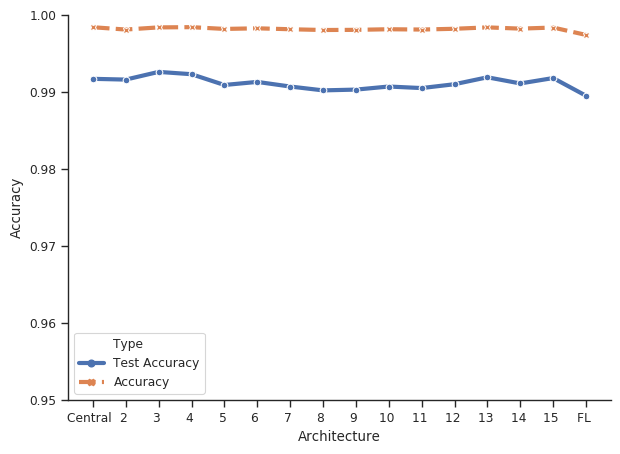

In [5]:
plot_graph(cifar, 'cifar',0.7,1.0)
plot_graph(mnist, 'mnist',0.95,1.0)

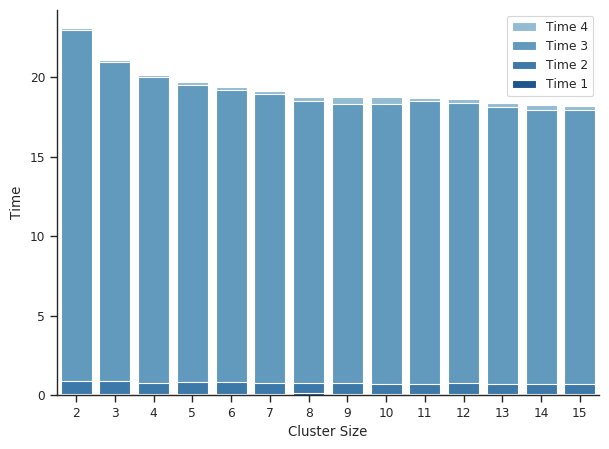

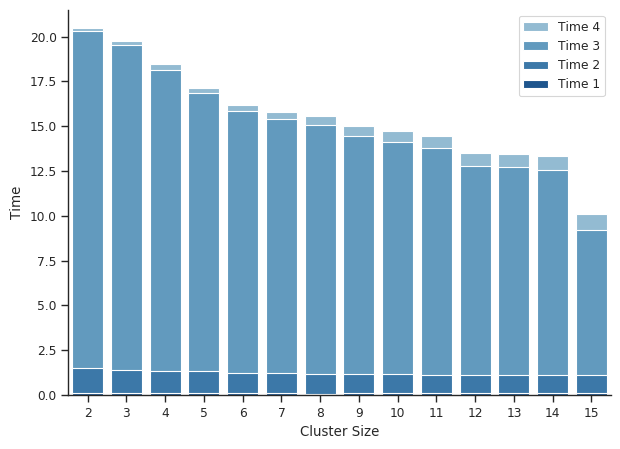

In [6]:
barPlotNice(mnistT, 'mnistTime')
barPlotNice(cifarT, 'cifarTime')

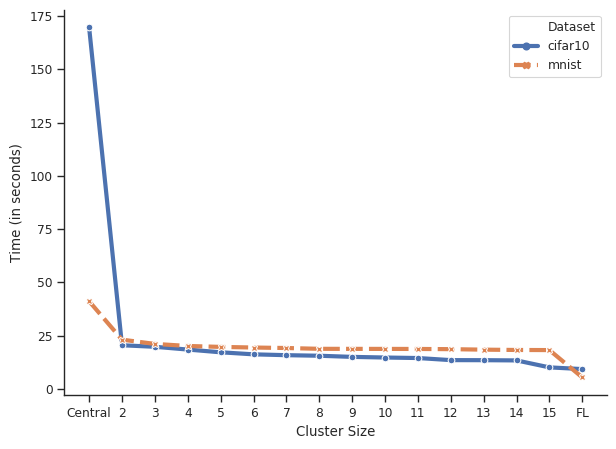

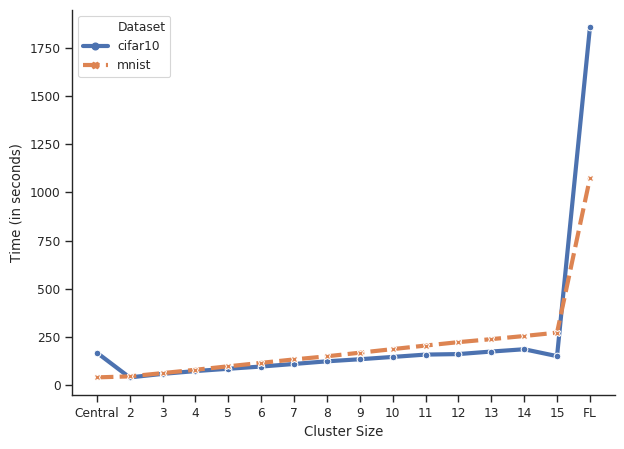

In [7]:
timePlot(timeC, 'TimeCluster')
timePlot(timeT, 'TimeTotal')